<a href="https://colab.research.google.com/github/hurchey/ARDS-prediction/blob/main/ards_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 2**

Acute respiratory distress syndrome (ARDS) is a serious lung condition that causes low blood oxygen. In this project, you need to make a preidction about if the patient has ARDS based on their medical notes. Each patient may have multiple notes.

Let's explore how to fine-tune an LLM on a single commodity GPU with [Ludwig](https://ludwig.ai/latest/), an open-source package that empowers you to effortlessly build and train machine learning models like LLMs, neural networks and tree based models through declarative config files.

In this notebook, we'll show an example of how to fine-tune Llama-2-7b to make prediction for the ARDS dataset.

By the end of this example, you will have gained a comprehensive understanding of the following key aspects:

1. **Ludwig**: An intuitive toolkit that simplifies fine-tuning for open-source Language Model Models (LLMs).
2. **Exploring the base model with prompts**: Dive into the intricacies of prompts and prompt templates, unlocking new dimensions in LLM interaction.
3. **Fine-Tuning Large Language Models**: Navigate the world of model fine-tuning optimizations for getting the most out of a single memory-contrained GPU, including: LoRA and 4-bit quantization.



# **Goal: Use LLMs For Medical-Case Prediction** 🏥

In this webinar, the goal is to use an LLM for prediction. The model will take natural language as input, and should return true(ARDS patient)/false(Non-ARDS patient) as output. We're first going to iterate on a base Llama-2-7b model with prompting, and finally instruction-fine-tune the model.

As an example, if we prompt the model with this instruction:

```
Instruction: Based on the provided context, return true if the pation has ARDS, otherwise return false.
Context: Note 1: EXAMINATION:  CHEST (PORTABLE AP)\n\nINDICATION:  ___ year old woman with hypoxemic respiratory ___\ntransferred from OSH  // please evaluate ETT and line position, please\nevaluate b/l chest tube, please evaluate etiology of hypoxemic respiratory\nfailure     please evaluate ETT and line position, please evaluate b/l chest\ntube, please evaluate etiology of hypoxemic respiratory failure\n\nIMPRESSION: \n\nIn comparison with the study of ___ from an outside facility, the the\nextensive pneumomediastinum is much less prominent.  There are improved lung\nvolumes.  Cardiac silhouette is within normal limits though there are diffuse\nareas of increased opacification involving both lungs.  Subsequent study\ndictated previously suggests that this appearance could reflect ARDS, though\npulmonary edema or widespread infection could be considered.\nBilateral chest tubes are in place and there are sub tiny apical\npneumothoraces on both sides.\n\nNote 2: INDICATION:  ___ year old woman with hypoxic respiratory failure  // ET tube\nplacement, pneumonthorax\n\nTECHNIQUE:  Chest PA and lateral\n\nCOMPARISON:  Chest radiograph from ___ from earlier today\n\nFINDINGS: \n\nThe lung volumes are stable.  Moderate to severe pulmonary edema is unchanged.\nThe cardiac silhouette is stable.  There is interval development of\npneumomediastinum with air tracking superiorly into the neck and right\nsupraclavicular region.  There is also some air surrounding the aortic arch. \nStable calcification of the aortic arch.  Any residual right apical\npneumothorax is tiny, if any.  Bilateral chest tubes are intact.  The ETT\nterminates abruptly 4.3 cm from the carina.\n\nIMPRESSION: \n\nInterval development of pneumomediastinum.  Unchanged moderate-severe\npulmonary edema.\n\nNOTIFICATION:   The findings were discussed with ___, M.D. by ___\n___, M.D. on the telephone on ___ at 2:02 ___, 5 minutes after\ndiscovery of the findings.\n\nNote 3: EXAMINATION:  CT CHEST W/O CONTRAST\n\nINDICATION:  ___ year old woman with hypoxic respiratory failure  //\ncharacterization of infilrates\n\nTECHNIQUE:   Multidetector CT performed without the administration of contrast\nof the entire volume of the thorax with multi planar reformations and MIP\nreconstructions.\n\nDOSE:  Acquisition sequence:\n   1) Spiral Acquisition 5.1 s, 32.9 cm; CTDIvol = 5.8 mGy (Body) DLP = 188.6\nmGy-cm.\n Total DLP (Body) = 189 mGy-cm.\n\nCOMPARISON:  ___\n\nFINDINGS: \n\nFINDINGS:\n\nNECK, THORACIC INLET, AXILLAE, CHEST WALL: No thyroid lesions.  No\nsupraclavicular or axillary adenopathy.  No gross breast lesions.  Right-sided\nPICC line in situ terminating in the right axillary vein (3, 9).  Moderate\nsubcutaneous air in the chest wall.\n\nUPPER ABDOMEN: This study was not tailored to evaluate the subdiaphragmatic\norgans.  Feeding tube in situ in the stomach.  The adrenals appear normal. \nHypodense cystic lesion in the midpole of the right kidney measuring 18 mm in\ndiameter with a slightly coarse mural calcification and is incompletely imaged\nand further characterization with ultrasound is advised.\n\nMEDIASTINUM: Moderate pneumomediastinum. Subcentimeter mediastinal lymph\nnodes.\n\nHILA: No hilar adenopathy.\n\nHEART and PERICARDIUM: Normal cardiac configuration.  Relative hypodensity of\nthe blood pool suggesting anemia.  No aortic valve or coronary artery\ncalcifications.\nPLEURA: Bilateral chest tubes in situ.  The left tube is kinked as it enters\nthe left pleural space (3, 31) and its function should be correlated\nclinically.  No significant residual pneumothorax.\nLUNG:\n\n-PARENCHYMA:  There is a diffuse interstitial pattern with ground-glass\nopacification of the lungs with apical basal and posterior gradient as\nevidenced by mild ground-glass opacification in the anterior aspect of the\nlungs, moderate ground-glass opacification of the mid lung zones and severe\nground-glass and consolidation seen in the posterior basal aspect of the\nlungs.  A few indeterminate pulmonary nodules.\n-AIRWAYS:  Endotracheal tube in-situ with the tip 23 mm proximal to the\ncarina.  The airways are patent to the subsegmental and.  Mild, but varicoid\nbronchiectasis most pronounced in the lower lobes.\n-VESSELS:  The pulmonary arteries not enlarged.\nCHEST CAGE: Spondylotic changes of the thoracic spine.  No lytic/ destructive\nbony lesions.\n\nIMPRESSION: \n\nImaging findings in keeping with acute lung injury/ ARDS (diffuse alveolar\ndamage) transitioning between the acute/exudative phase to the organizing\nphase.\nThe posterior basal consolidation most likely reflects a combination of\nexudate and atelectasis, but please note that infection cannot be excluded\nwith certainty.\n\nModerate pneumomediastinum, but no features of tension.\n\nRight-sided PICC line in situ terminating in the right axillary vein.\n\nThe left-sided chest tube is kinked as it enters the pleural space and its\nfunction should be correlated clinically.\n\nRECOMMENDATION(S):  Ultrasound of the right kidney.\n\nNote 4: INDICATION:  ___ with PMH of DM, HLD who presents as a transfer from OSH\nwith acute hypoxemic hypercarbic respiratory failure concerning for ARDS, s/p\nsubclavian line placement.  // please eval placement of new L subclavian line \nContact name: ___: ___\n\nTECHNIQUE:  Chest PA and lateral\n\nCOMPARISON:  Chest radiograph from ___ earlier today\n\nFINDINGS: \n\nThe left central subclavian catheter terminates in the cavoatrial junction. \nThe lung volumes are stable.  Moderate to severe pulmonary edema is unchanged.\nThe cardiac silhouette is stable.  Slight interval improvement\npneumomediastinum, however the neck is beyond the margins of this image. \nStable calcification of the aortic arch.  Bilateral chest tubes are intact. \nThe ETT terminates approximately 3 cm from the carina.  The NG tube traverses\nthe diaphragm however the tip is not visualized on this image.\n\nIMPRESSION: \n\nLeft central subclavian catheter terminates in the cavoatrial junction. \nInterval improvement of pneumomediastinum.\n\nNote 5: EXAMINATION:  CHEST (PORTABLE AP)\n\nINDICATION:  ___ year old woman with ARDS  // eval interval change in pulm\ninfiltrates      eval interval change in pulm infiltrates\n\nIMPRESSION: \n\nCompared to chest radiographs ___ through ___.\n\nBibasilar consolidation is more pronounced.  Ground-glass opacification in mid\nand upper lung zones is stable.  Pleural effusions are small.  Right apical\npneumothorax is tiny.  Heart size is normal.\n\nET tube, left subclavian line, right upper thoracostomy tube all in standard\nplacements unchanged.  Right axillary catheter ends outside the chest.  Left\npleural drainage catheter is oriented horizontally.\n\nNote 6: EXAMINATION:  RENAL U.S.\n\nINDICATION:  ___ with PMH of DM, HLD who presents as a transfer from OSH\nwith acute hypoxemic hypercarbic respiratory failure concerning for ARDS  //\nplease eval R renal cyst for concerning features, e.g. RCC\n\nTECHNIQUE:  Grey scale and color Doppler ultrasound images of the kidneys were\nobtained.\n\nCOMPARISON:  None.\n\nFINDINGS: \n\nThe right kidney measures 12.0 cm. The left kidney measures 11.8 cm.  A simple\ncyst is seen in the lateral left kidney measuring 1.6 x 0.9 x 1.2 cm.  There\nare 2 adjacent cysts in the mid right kidney.  1 of the is simple, and\nmeasures 1.4 x 1.8 x 1.5 cm.  The other cyst, which contains internal echoes\nand rim calcification, measures 2.1 x 1.9 x 1.7 cm.  This does not demonstrate\na solid component or internal vascularity.  Normal cortical echogenicity and\ncorticomedullary differentiation are seen bilaterally.\n\nA Foley seen within the decompressed bladder.\n\nIMPRESSION: \n\n1.  Bilateral simple renal cysts.\n2.  Complex right renal cyst with a coarse calcification.  No solid renal\nmasses identified.\n\nNote 7: EXAMINATION:  CHEST (PORTABLE AP)\n\nINDICATION:  ___ year old woman with ards, bilateral chest tubes  // any\ninterval change in lungs? L chest tube clamped      any interval change in\nlungs? L chest tube clamped\n\nIMPRESSION: \n\nIn comparison with the study of earlier in this date, with the left chest tube\nclamped there is no evidence of enlargement of the tiny apical pneumothorax. \nSmall amount of subcutaneous gas is seen along the left lateral chest wall.\nThe diffuse bilateral pulmonary opacifications are slightly less prominent,\nmost likely reflecting the better inspiration of the patient.\n\nNote 8: EXAMINATION:  CHEST (PORTABLE AP)\n\nINDICATION:  ___ year old woman with ARDS, bilateral pneumothoraces  //\nprogression of infiltrates, PTX with bilateral chest tubes      progression of\ninfiltrates, intubated\n\nIMPRESSION: \n\nComparison to ___.  The monitoring and support devices, including\nthe left chest tube, are in stable position.  The medial aspect of the left\npneumothorax has increased in size.  There is no evidence of tension.  The\nvery widespread parenchymal opacities have also minimally increased, notably\nat the right and left lung bases.  No other changes are noted.  The right\nchest tube is in stable position.\n\nNote 9: EXAMINATION:  CHEST (PORTABLE AP)\n\nINDICATION:  ___ year old woman with h/o ARDS and b/l PTX s/p removal of L\nchest tube  // please evaluate for reaccumulation of PTX s/p chest tube\nremoval on left\n\nTECHNIQUE:  Chest single view\n\nCOMPARISON:  ___ 05:02\n\nFINDINGS: \n\nThe apical pneumothorax stable.  Pneumomediastinum has decreased in size. \nSmall left apical pneumothorax is similar to minimally more prominent. \nAppliances are in good position.  Normal heart size, pulmonary vascularity. \nDecreased bilateral hazy pulmonary opacities.  Improved bibasilar\nconsolidations.  Small volume subcutaneous emphysema right neck base.\n\nIMPRESSION: \n\nDecrease pneumomediastinum.  Small left apical pneumothorax, similar to\nminimally increased.  Stable tiny right apical pneumothorax.  Improved lung\nparenchymal findings.\n\nNote 10: INDICATION:  ___ with PMH of DM, HLD who presents as a transfer from OSH\nwith acute hypoxemic hypercarbic respiratory failure concerning for ARDS //\nmonitor interval change\n\nTECHNIQUE:  Chest PA and lateral\n\nCOMPARISON:  ___.\n\nFINDINGS: \n\nEndotracheal tube in-situ with the tip at the level of the medial clavicles 58\nmm proximal to the carina.  Nasogastric tube in situ coursing out of sight\ninferiorly. Left-sided subclavian central catheter tip in the mid to distal\nSVC.  Right-sided chest drain in situ.  Small to moderate pneumomediastinum\nwith subcutaneous air also seen in the neck and bilateral pectoralis muscles. \nDiffuse pulmonary ground-glass opacification with mild consolidation in the\nlung bases are essentially unchanged in keeping with ARDS.\n\nIMPRESSION: \n\nAs above\n\nNOTIFICATION:   The findings were discussed with ___, M.D. by ___\n___, M.D. on the telephone on ___ at 6:00 ___, 20 minutes after\ndiscovery of the findings.\n\nNote 11: EXAMINATION:  CHEST (PORTABLE AP)\n\nINDICATION:  ___ year old woman with ards on vent with chest tubes now with\nincreasing pressure readings on esophageal balloon and subQ air  // any\ninterval change? any reaccumulation of pneumothorax/     any interval change?\nany reaccumulation of pneumothorax/\n\nIMPRESSION: \n\nIn comparison with the study of ___, there is little overall change. \nMonitoring and support devices are stable.  Moderate pneumomediastinum\npersists with gas extending into the neck and in the pectoral region\nbilaterally.  Diffuse opacifications bilaterally are essentially unchanged.\n\nNote 12: EXAMINATION:  CHEST (PORTABLE AP)\n\nINDICATION:  ___ year old woman with ARDS intubated with chest tubes and subQ\nair  // Eval for interval change      Eval for interval change\n\nIMPRESSION: \n\nET tube tip is 4 cm above the carinal.  NG tube tip is in the stomach.  Left\nsubclavian line tip is at the level of mid SVC.  Right chest tube is in place.\n\nPulmonary edema is substantial.  There extensive amount of subcutaneous air. \nNo definitive pneumothorax or pneumomediastinum currently seen.\n\nNote 13: EXAMINATION:  CHEST (PORTABLE AP)\n\nINDICATION:  ___ year old woman with ARDS, bilateral pneumothorax, subcutaneous\nemphysema, pneumo mediastinum  // Evaluate progression of PTX,\npneumomediastinum     Evaluate progression of PTX, pneumomediastinum\n\nIMPRESSION: \n\nCompared to chest radiographs ___ through ___:\n\nSubcutaneous emphysema in the chest wall and neck has improved since ___.  Residual pneumomediastinum is mild pneumothorax minimal if any at the\nright apex.  No appreciable pleural effusion.\n\nDiffuse ground-glass opacification in the lungs is improved since ___,\nbut not more recently.  There is the suggestion of developing bronchiectasis\nin bibasilar consolidation which could be due to developing fibrosis.\n\nHeart size normal.  Pleural effusion small if any.\n\nMultiple cardiopulmonary support devices in standard placements.\n\nNote 14: EXAMINATION:  CHEST (PORTABLE AP)\n\nINDICATION:  ___ year old woman with ARDS and pneumothorax s/p R chest tube  //\neval interval improvement of subcutaneous air, interstitial infiltrates     \neval interval improvement of subcutaneous air, interstitial infiltrates\n\nIMPRESSION: \n\nComparison to ___.  Stable monitoring and support devices.  In\nparticular, the right chest tube is in stable position.  No evidence of\npneumothorax.  Normal size of the heart.  Stable mild bilateral areas of\nbasilar atelectasis and mild fluid overload.  No pleural effusions.  Stable\nnormal appearance of the heart.\n\nNote 15: EXAMINATION:  CHEST (PORTABLE AP)\n\nINDICATION:  ___ year old woman with ET tube  // assess tube placement     \nassess tube placement\n\nIMPRESSION: \n\nCompared to chest radiographs ___ through ___.\n\nSmall volume of pneumomediastinum and tiny right apical pneumothorax are are\nunchanged.  Subcutaneous emphysema has nearly resolved.\n\nGlobal ground-glass opacification is still present throughout the lungs along\nwith consolidation at the lung bases, improved slightly on the left.  Pleural\neffusion is small if any.  Heart size is normal.\n\nET tube, right apical thoracostomy tube, left subclavian line are in standard\nplacements and an esophageal drainage tube passes into the stomach and out of\nview.\n\nNote 16: EXAMINATION:  CHEST (PORTABLE AP)\n\nINDICATION:  ___ with PMH of DM, HLD who presents as a transfer from OSH\nwith acute hypoxemic hypercarbic respiratory failure concerning for ARDS with\nR chest tube  // r/o pneumothorax     r/o pneumothorax\n\nIMPRESSION: \n\nIn comparison with the study of earlier in this date, the right chest tube\nremains in place.  There is a tiny apical pneumothorax and a small amount of\npneumomediastinum.\nOtherwise little change.\n\n
```

We want the model to produce exactly this response:

```
Response: true
```



# **A Quick 2 Minute Introduction To Ludwig** ⏰

Every Ludwig model is based on a config, which requires at least input feature and one output feature to be defined. For example,

```yaml
input_features:
  - name: instruction
    type: text
output_features:
  - name: output
    type: text
```

is a simple Ludwig config that tells Ludwig to use the column called `instruction` in our dataset as an input feature and the `output` column in our dataset as an `output` feature. This is the simplest Ludwig config we can define - it's just 6 lines and works out of the box!

To make Ludwig compatible with LLMs, **Ludwig 0.8** introduced a new `model_type` called `llm` and a new keyword `base_model` that must be specified:

```yaml
model_type: llm
base_model: meta-llama/Llama-2-7b-hf
input_features:
  - name: instruction
    type: text
output_features:
  - name: output
    type: text
```

The `model_type` parameter indicates is used to tell Ludwig you want to use the LLM model type (Ludwig supports LLMs, general deep neural networks and trees).
The `base_model` parameter is the path to any HuggingFace CausalLM listed [here](https://huggingface.co/models?pipeline_tag=text-generation&sort=trending).

For this webinar, we're going to make use of the Python LudwigModel API. This requires just one main object during initialization: a YAML config defining your training pipeline. The initialized LudwigModel object then exposes a variety of methods like `preprocess()`, `train()`, `evaluate()` and `predict()`. We will see this in practice in the next few sections.

## **Basic Setup** 🧰

We're going to install Ludwig, setup our HuggingFace Token and load our dataset that we will be running experiments with.

### **Install Ludwig and Ludwig's LLM related dependencies.**

Install Ludwig from the latest release

In [ ]:
!pip uninstall -y tensorflow --quiet
!pip install ludwig
!pip install ludwig[llm]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 16.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 21.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=d3510a9b9e9528b04b86fe22824329ace8f5901ba0d358b7e88f0f542581113c
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


Enable text wrapping so we don't have to scroll horizontally and create a function to flush CUDA cache.

In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))

get_ipython().events.register('pre_run_cell', set_css)

def clear_cache():
  if torch.cuda.is_available():
    model = None
    torch.cuda.empty_cache()

### **Setup Your HuggingFace Token** 🤗

We'll be exploring Llama-2 today, which a model released by Meta. However, the model is not openly-accessible and requires requesting for access (assigned to your HuggingFace **READ** token).

Obtain a [HuggingFace API Token](https://huggingface.co/settings/tokens) and request access to [Llama2-7b-hf](https://huggingface.co/meta-llama/Llama-2-7b-hf) before proceeding. You may need to signup on HuggingFace if you don't aleady have an account: https://huggingface.co/join

Incase you haven't been given access to Llama-2-7b, that is alright. We can just use Llama-1 for the rest of this example: [huggyllama/llama-7b](https://huggingface.co/huggyllama/llama-7b).

In [ ]:
import getpass
import locale; locale.getpreferredencoding = lambda: "UTF-8"
import logging
import os
import torch
import yaml

from ludwig.api import LudwigModel


os.environ["HUGGING_FACE_HUB_TOKEN"] = getpass.getpass("Input Your Huggingface READ Token:")
assert os.environ["HUGGING_FACE_HUB_TOKEN"]

Input Your Huggingface READ Token:··········


**Before you run the next cells, please manually upload the data file to google
drive.**

Mount google drive to colab so we can access the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Import The ARDS Dataset** 📋



If you can't load the dataset, please check if you have mounted google drive, and if the file name/path is correct.

In [ ]:
from google.colab import data_table; data_table.enable_dataframe_formatter()
import numpy as np; np.random.seed(123)
import pandas as pd
import pickle as pkl
df = pd.read_pickle("/content/drive/MyDrive/COSI149_project/training.pkl")
df = df.fillna("")
# We're going to create a new column called `split` where:
# 90% will be assigned a value of 0 -> train set
# 10% will be assigned a value of 1 -> validation set
# Calculate the number of rows for each split value
total_rows = len(df)
split_0_count = int(total_rows * 0.9)
split_1_count = total_rows - split_0_count



import pandas as pd
import os
import matplotlib.pyplot as plt
import pickle as pkl
import nltk
from nltk.corpus import stopwords
import re
import collections
from collections import Counter






# Create an array with split values based on the counts
split_values = np.concatenate([
    np.zeros(split_0_count),
    np.ones(split_1_count),
])

# Shuffle the array to ensure randomness
np.random.shuffle(split_values)

# Add the 'split' column to the DataFrame
df['split'] = split_values
df['split'] = df['split'].astype(int)

# Function to clean up the text.
def preprocess_string_to_list(text):
    # Remove escape sequences and unwanted characters
    text = text.replace('___', '')
    text = re.sub(r'\n', ' ', text)  # Replace newline characters with spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove non-word and non-space characters
    text = re.sub(' +', ' ', text)  # Remove extra spaces
    return text

def make_lowercase(text):
    return text.lower()

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word.lower() not in stop_words])

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def replace_numbers_with_token(text, token="<NUM>"):
    return re.sub(r'\d+', token, text)

# Function to do stemming and lemmatization
# from nltk.stem import PorterStemmer, WordNetLemmatizer
# nltk.download('wordnet')

# stemmer = PorterStemmer()
# lemmatizer = WordNetLemmatizer()

# def stem_and_lemmatize(text):
#     stems = [stemmer.stem(word) for word in text.split()]
#     lemmas = [lemmatizer.lemmatize(word) for word in text.split()]
#     return stems, lemmas

# from transformers import T5ForConditionalGeneration, T5Tokenizer

# # Choose a model size
# model_name = "t5-large"

# # Load the T5 model from the Hugging Face Transformers library
# model = T5ForConditionalGeneration.from_pretrained(model_name)
# tokenizer = T5Tokenizer.from_pretrained(model_name, modelsize = )

# text_to_summarize = df['text']

# # Preprocess the text
# input_ids = tokenizer.encode("summarize: " + text_to_summarize)


# summary_ids = model.generate(input_ids, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
# summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# print(summary)




# from transformers import T5ForConditionalGeneration, T5Tokenizer

# def summarize_text(text, model_name='t5-small', max_length=512, min_length=40, length_penalty=2.0, num_beams=4):
#     """
#     Summarize the input text using the T5 model.

#     Parameters:
#     - text (str): The text to be summarized.
#     - model_name (str): The T5 model variant to use. Defaults to 't5-small'.
#     - max_length (int): The maximum length of the summary.
#     - min_length (int): The minimum length of the summary.
#     - length_penalty (float): The length penalty to use for beam search.
#     - num_beams (int): The number of beams to use for beam search.

#     Returns:
#     - summary (str): The summarized text.
#     """

#     # Load the T5 model from Hugging Face Transformers library
#     model = T5ForConditionalGeneration.from_pretrained(model_name)
#     tokenizer = T5Tokenizer.from_pretrained(model_name)

#     # Encode the text into tensor of token ids
#     input_ids = tokenizer.encode("summarize: " + text, return_tensors="pt", truncation=True)

#     # Generate summary output tensor
#     summary_ids = model.generate(
#         input_ids,
#         max_length=max_length,
#         min_length=min_length,
#         length_penalty=length_penalty,
#         num_beams=num_beams,
#         early_stopping=True
#     )

#     # Decode the tensor into a text string
#     summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

#     return summary

# Example usage:
# text_to_summarize = "The quick brown fox jumps over the lazy dog multiple times. This sentence is commonly used as a typing test."
# summary = summarize_text(text_to_summarize)
# print(summary)

import pickle
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Process only the first 1100 elements
data_to_process = df[1101:2100]

# Load the tokenizer and model from Hugging Face
tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')

# Function to summarize a piece of text
def summarize_text(text):
    # Encode the text into tensor of integers using the appropriate tokenizer
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=512, truncation=True)
    # Generate the summary output
    outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    # Decode the output tensor to a string
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary

FileNotFoundError: ignored

In [ ]:
#Creating the original count of words of the text
df['original_text_word_count'] = df['text'].apply(lambda x: len(x.split()))

# We are reducing the size of the original text be removing the characters that are newline, non-word, none-space, and extra space
df['text_cleaned'] = df['text'].apply(preprocess_string_to_list)

df['text_cleaned2'] = df['text_cleaned'].apply(make_lowercase)

df['text_cleaned3'] = df['text_cleaned2'].apply(remove_stopwords)

df['text_cleaned4'] = df['text_cleaned3'].apply(remove_numbers)

df['text_cleaned5'] = df['text_cleaned4'].apply(replace_numbers_with_token)

df['text_cleaned6'] = df['text_cleaned5'].apply(summarize_text)

# Reduced Text is now split into a list of words.
df['split_words'] = df['text_cleaned2'].apply(lambda x: x.split())

# We create a column with the count of split words.
df['split_words_counts'] = df['split_words'].apply(lambda x: len(x))

df['split_words_counts'].describe()

## **Understanding The ARDS Dataset** 📖




In [ ]:
df.head(2)

,text,label,split
0,Note 1: EXAMINATION: CHEST (PA AND LAT)\n\nIN...,True,0
1,Note 1: EXAMINATION: CHEST (PORTABLE AP)\n\nI...,True,0


This dataset is meant to train a large language model to following instructions to produce code from natural language. Each row in the dataset consists of an:
- `instruction` that describes a task
- `input` when additional context is required for the instruction, and
- the expected `output`.

```
Instruction: "Based on the provided context, return true if the pation has ARDS, otherwise return false."
Input: #MEDICAL NOTES FOR THE PATIENT#
Output:True
```
We need to prepare the instruction and output for our dataset. We treat the output as strings.

In [ ]:
DEMO_PROMPT = "Based on the following medical notes, please predict whether the patient described is likely to have Acute Respiratory Distress Syndrome (ARDS). Your prediction should be either 'true' if ARDS is likely, or 'false' if it is not likely."
df['instruction'] = DEMO_PROMPT
df = df.rename(columns={'text':'notes', 'label':'output'})
df = df.astype({'output':'str'})
df.head(1)

,notes,output,split,instruction
0,Note 1: EXAMINATION: CHEST (PA AND LAT)\n\nIN...,True,0,"Based on the following medical notes, please p..."


The other aspect worth noting is the average number of characters in each of the three columns `instruction`, `input` and `output` in the dataset. Typically, every 3-4 characters maps to a *token* (the basic building blocks that language models use to understand and analyze text data), and large language models have a limit on the number of tokens they can take as input.

Average number of tokens in the instruction column: 78
Average number of tokens in the notes column: 1738
Average number of tokens in the output column: 2



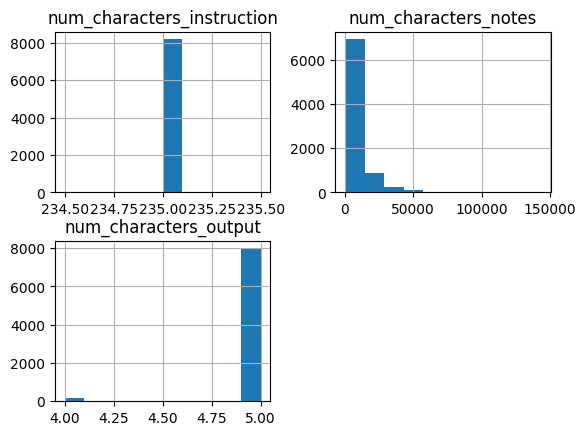

In [ ]:
# Calculating the length of each cell in each column
df['num_characters_instruction'] = df['instruction'].apply(lambda x: len(x))
df['num_characters_notes'] = df['notes'].apply(lambda x: len(x))
df['num_characters_output'] = df['output'].apply(lambda x: len(x))

# Show Distribution
df.hist(column=['num_characters_instruction', 'num_characters_notes', 'num_characters_output'])

# Calculating the average
average_chars_instruction = df['num_characters_instruction'].median()
average_chars_notes = df['num_characters_notes'].median()
average_chars_output = df['num_characters_output'].median()

print(f'Average number of tokens in the instruction column: {(average_chars_instruction / 3):.0f}')
print(f'Average number of tokens in the notes column: {(average_chars_notes / 3):.0f}')
print(f'Average number of tokens in the output column: {(average_chars_output / 3):.0f}', end="\n\n")

The maximum context length for the base LLaMA-2 model is 4096 tokens. However, since we are using a free GPU, the GPU Memory limits the token length to around 400. We need to truncate the medical notes to avoid out-of-memory issue. A dummy method is to the get the first 400-78(instruction token)-2(output token)=320 tokens(1260 characters) in the notes and drop the rest. Later, you will need to design your own method to truncate the notes. If you get an `CUDA OUT OF MEMORY` error during fine-tuning, you may come back to this cell and use a more strict token limit. You can monitor the GPU RAM usage on the top right.

In [ ]:
TOKEN_LIMIT = 400
characters_allowed = int((TOKEN_LIMIT - average_chars_instruction/3 - average_chars_output/3)*3)
df['input'] = df['notes'].apply(lambda x: x[0:min(len(x), characters_allowed)])
df.head(2)

NameError: ignored

In [ ]:
df['num_characters_input'] = df['input'].apply(lambda x: len(x))

NameError: ignored

# **Declaratively Fine-Tune Large Language Models**

Fine-tuning a large language model **refers to the process of further training the pre-trained model on a specific task or domain using a smaller dataset.** The initial pre-training phase involves training a language model on a massive corpus of text data to learn general language patterns and representations. Fine-tuning, on the other hand, customizes the model to a specific task or domain by exposing it to task-specific data. By fine-tuning a large language model on a specific task, you leverage the pre-trained knowledge of the model while tailoring it to the nuances and requirements of your target task. This typically allows the model to perform better and achieve higher accuracy on the specific task compared to using the pretrained model by itself for your specific task.

#### ▶ **What is instruction following/tuning? Why should I do it?**

Pre-trained language models are often great at giving general answers, but they struggle when asked to follow specific instructions, especially for tasks in certain domains. To make a pre-trained model do better at these specific tasks, we can train it on examples of those tasks. This is called instruction fine-tuning. We use a dataset with pairs of `{instructions, outputs}` in the domain, and this helps the model learn to give the right response when given those types of instructions. This training process typically changes the underlying model weights, but there are also other ways to train it without doing this. When done correctly, this process teaches the model to understand and follow instructions it couldn't handle well before.

#### ▶ **What will this teach the model?**

Here's an example of prompting the base model and an example prompting the fine-tuned model. The model was given all of the text until `Response:`, and it was supposed to continue generating an appropriate response.

**Using the base model (no fine-tuning):** 👎
```
Instruction: "Based on the provided context, return true if the pation has ARDS, otherwise return false."
Input: #MEDICAL NOTES FOR THE PATIENT#
Output:Instruction: "Based on the provided context, return true if the pation has ARDS, otherwise return false."
Input: #MEDICAL NOTES FOR THE PATIENT#
```

**After instruction-fine-tuning:** 👍
```
Instruction: "Based on the provided context, return true if the pation has ARDS, otherwise return false."
Input: #MEDICAL NOTES FOR THE PATIENT#
Output:True
```

The base model does not know how to follow-instructions and answer the question for our task, so just repeats the inputs we passed in until the token limit is hit. Our fine-tuned model should be able to respond back correctly (these are actual outputs from a model we fine-tuned).


There are three different fine-tuning approaches in Ludwig:

1. **Full Fine-Tuning**:

- Involves training the entire pre-trained model on new data from scratch.
- All model layers and parameters are updated during fine-tuning.
- Can lead to high accuracy but requires a significant amount of computational resources and time.
- Runs the risk of catastrophic forgetting: occasionally, since we are updating all of the weights in the model, this process can lead to the algorithm inadvertently losing knowledge of its past tasks, i.e., the knowledge it gained during pretraining. The outcome may vary, with the algorithm experiencing heightened error margins in some cases, while in others, it might completely erase the memory of a specific task leading to terrible performance.
- Best suited when the target task is significantly different from the original pre-training task.

2. **Parameter Efficient Fine-Tuning (PEFT), e.g. LoRA**:

- Focuses on updating only a subset of the model's parameters.
- Often involves freezing certain layers or parts of the model to avoid catastrophic forgetting, or inserting additional layers that are trainable while keeping the original model's weights frozen.
- Can result in faster fine-tuning with fewer computational resources, but might sacrifice some accuracy compared to full fine-tuning.
- Includes methods like LoRA, AdaLoRA and Adaption Prompt (LLaMA Adapter)
- Suitable when the new task shares similarities with the original pre-training task.

3. **Quantization-Based Fine-Tuning (QLoRA)**:

- Involves reducing the precision of model parameters (e.g., converting 32-bit floating-point values to 8-bit or 4-bit integers). This reduces the amount of CPU and GPU memory required by either 4x if using 8-bit integers, or 8x if using 4-bit integers.
- Typically, since we're changing the weights to 8 or 4 bit integers, we will lose some precision/performance.
- This can lead to reduced memory usage and faster inference on hardware with reduced precision support.
- Particularly useful when deploying models on resource-constrained devices, such as mobile phones or edge devices.


**We're going to fine-tune using method 3 since we only have access to a single T4 GPU with 16GiB of GPU VRAM on Colab.** If you have more compute available, give LoRA based fine-tuning or full fine-tuning a try! Typically this requires 4 GPUs with 24GiB of GPU VRAM on a single node multi-GPU cluster and fine-tuning Deepspeeed.


To do this, the new parameters we're introducing are:

- `adapter`: The PEFT method we want to use
- `quantization`: Load the weights in int4 or int8 to reduce memory overhead.
- `trainer`: We enable the `finetune` trainer and can configure a variety of training parameters such as epochs and learning rate.

**Important Note: Set an alarm clock⏰ to upload/download your model in time, otherwise colab will kill the runtime and you will lose all training progress.**

**Important Notes2: If you get a `CUDA OUT OF MEMORY` error, you need to restart the runtime because the garbage memory can't be properly collected.**

**Important Notes3: If it shows no GPU runtime available, it means you have reached to limit for free accounts and you need to wait for 24 hours to get access to new GPU nodes.**

The cell below provides an example to finetune LLAMA2-7B model. You don't really need to wait for the cell to finish as we will optimize it later.

In [ ]:
model = None
clear_cache()
df_train = df
qlora_fine_tuning_config = yaml.safe_load(
"""
model_type: llm
base_model: meta-llama/Llama-2-7b-hf

input_features:
  - name: instruction
    type: text

output_features:
  - name: output
    type: text

prompt:
  template: >-
    Below is an instruction that describes a task, paired with an input
    that may provide further context. Write a response that appropriately
    completes the request.

    ### Instruction: {instruction}

    ### Input: {input}

    ### Response:

generation:
  temperature: 0
  max_new_tokens: 10

adapter:
  type: lora
  r: 4

quantization:
  bits: 4

trainer:
  type: finetune
  epochs: 1
  batch_size: 1
  eval_batch_size: 1
  gradient_accumulation_steps: 16
  learning_rate: 0.00001
  optimizer:
    type: adam
    params:
      eps: 1.e-8
      betas:
        - 0.9
        - 0.999
      weight_decay: 0
  learning_rate_scheduler:
    warmup_fraction: 0.03
    reduce_on_plateau: 0
"""
)

model = LudwigModel(config=qlora_fine_tuning_config, logging_level=logging.INFO)
results = model.train(dataset=df_train)

INFO:ludwig.utils.print_utils:
INFO:ludwig.utils.print_utils:╒════════════════════════╕
INFO:ludwig.utils.print_utils:│ EXPERIMENT DESCRIPTION │
INFO:ludwig.utils.print_utils:╘════════════════════════╛
INFO:ludwig.utils.print_utils:
INFO:ludwig.api:╒══════════════════╤═════════════════════════════════════════════════════════════════════════════════════════╕
│ Experiment name  │ api_experiment                                                                          │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│ Model name       │ run                                                                                     │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│ Output directory │ /content/results/api_experiment_run                                                     │
├──────────────────┼─────────────────────────────────────────────────────────────────

INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of meta-llama/Llama-2-7b-hf tokenizer
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
INFO:ludwig.features.text_feature:Max length of feature 'None': 522 (without start and stop symbols)
INFO:ludwig.features.text_feature:Setting max length using dataset: 524 (including start and stop symbols)
INFO:ludwig.features.text_feature:max sequence length is 524 for feature 'None'
INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of meta-llama/Llama-2-7b-hf tokenizer
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
INFO:ludwig.features.text_feature:Max length of feature 'output': 2 (without start and stop symbols)
INFO:ludwig.features.text_feature:Setting max length using dataset: 4 (including start and stop symbols)
INFO:ludwig.features.t

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:ludwig.models.llm:Done.
INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of meta-llama/Llama-2-7b-hf tokenizer
INFO:ludwig.models.llm:==================================================
INFO:ludwig.models.llm:Trainable Parameter Summary For Fine-Tuning
INFO:ludwig.models.llm:Fine-tuning with adapter: lora
INFO:ludwig.models.llm:==================================================
INFO:ludwig.utils.print_utils:
INFO:ludwig.utils.print_utils:╒══════════╕
INFO:ludwig.utils.print_utils:│ TRAINING │
INFO:ludwig.utils.print_utils:╘══════════╛
INFO:ludwig.utils.print_utils:


trainable params: 2,097,152 || all params: 6,740,512,768 || trainable%: 0.03111264783824826


INFO:ludwig.trainers.trainer:Creating fresh model training run.
INFO:ludwig.trainers.trainer:Training for 5726 step(s), approximately 1 epoch(s).
INFO:ludwig.trainers.trainer:Early stopping policy: 5 round(s) of evaluation, or 28630 step(s), approximately 5 epoch(s).

INFO:ludwig.trainers.trainer:Starting with step 0, epoch: 0


Training:   6%|▌         | 345/5726 [07:08<1:50:29,  1.23s/it, loss=0.719]

CRITICAL:ludwig.trainers.trainer:
Received SIGINT, will finish this training step and then conclude training.
CRITICAL:ludwig.trainers.trainer:Send another SIGINT to immediately interrupt the process.


Training:   6%|▌         | 346/5726 [07:10<1:52:30,  1.25s/it, loss=0.699]

FileNotFoundError: ignored

#### Perform Inference

We can now use the model we fine-tuned above to make predictions on some test examples to see whether fine-tuning the large language model improve its ability to follow instructions/the tasks we're asking it to perform.

In [ ]:
test_examples = df[11:13]
predictions = model.predict(test_examples)[0]
for input_with_prediction in zip(test_examples['instruction'], test_examples['input'], predictions['output_response']):
  print(f"Instruction: {input_with_prediction[0]}")
  print(f"Input: {input_with_prediction[1]}")
  print(f"Generated Output: {input_with_prediction[2][0]}")
  print("\n\n")

INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of meta-llama/Llama-2-7b-hf tokenizer
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "do_sample": true,
  "max_length": 32,
  "max_new_tokens": 10,
  "pad_token_id": 2,
  "temperature": 0.1
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: based on the following medical notes, please predict whether the patient described is likely to have acute respiratory distress syndrome (ards). your prediction should be either 'true' if ards is likely, or 'false' if it is not likely.
### input: note 1: examination:   ct head w/o contrast q111

indication:  ___ year old woman now s/p left crani for tumor resection - please
perform prior to ___  // ? interval changes / post operative hemorrhage
/stroke

technique:  multidetector ct images of the head were obtained without
intravenous contrast.  sagittal and cor

Prediction: 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]


INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of meta-llama/Llama-2-7b-hf tokenizer


Instruction: Based on the following medical notes, please predict whether the patient described is likely to have Acute Respiratory Distress Syndrome (ARDS). Your prediction should be either 'true' if ARDS is likely, or 'false' if it is not likely.
Input: Note 1: EXAMINATION:   CT HEAD W/O CONTRAST Q111

INDICATION:  ___ year old woman now s/p Left crani for tumor resection - please
perform PRIOR to ___  // ? interval changes / post operative hemorrhage
/stroke

TECHNIQUE:  Multidetector CT images of the head were obtained without
intravenous contrast.  Sagittal and coronal reformations were also performed.

DOSE:  Acquisition sequence:
   1) Sequenced Acquisition 16.0 s, 16.5 cm; CTDIvol = 48.6 mGy (Head) DLP =
802.7 mGy-cm.
 Total DLP (Head) = 803 mGy-cm.

COMPARISON:  Head CT is available from ___ and more recent MR from
the prior day.

FINDINGS: 

Patient is status post left frontotemporal craniotomy with craniectomy with
craniotomy with left anterior temporal lobe resection.  Ther

/usr/local/lib/python3.10/dist-packages/ludwig/features/feature_utils.py:102: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(sequence_probabilities))


# **Save Trained Model Artifacts To HuggingFace** 🤗

Now that we have a fine-tuned model, we can export the model weights to HuggingFace hub so we can use them later. Ludwig supports uploading model weights directly to HuggingFace Hub via the `upload` Ludwig command.

```
!ludwig upload hf_hub --repo_id <hf_user_name>/<repo_name> --model_path <top_level_model_directory>
```

The `model-path` can be seen at the end of training/fine-tuning, as seen in this screenshot. You need to get a Huggingface **Write** API to upload

<br>

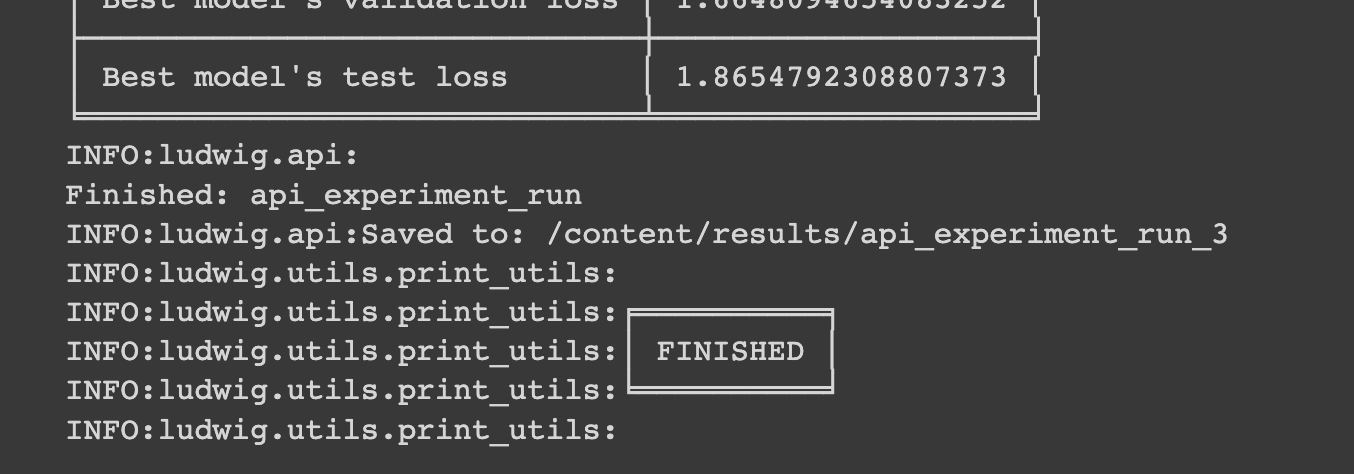


In [ ]:
!ludwig upload hf_hub --repo_id MomochiKyaru/example --model_path /content/results/api_experiment_run


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /roo

If you want to store your weights locally, you may also download it through colab.

In [ ]:
!zip -r /content/file.zip /content/results/api_experiment_run

  adding: content/results/api_experiment_run/ (stored 0%)
  adding: content/results/api_experiment_run/description.json (deflated 80%)
  adding: content/results/api_experiment_run/model/ (stored 0%)
  adding: content/results/api_experiment_run/model/model_hyperparameters.json (deflated 88%)
  adding: content/results/api_experiment_run/model/logs/ (stored 0%)
  adding: content/results/api_experiment_run/model/logs/training/ (stored 0%)
  adding: content/results/api_experiment_run/model/logs/training/events.out.tfevents.1696539509.61bd12dab543.206.0 (deflated 80%)
  adding: content/results/api_experiment_run/model/logs/test/ (stored 0%)
  adding: content/results/api_experiment_run/model/logs/test/events.out.tfevents.1696539509.61bd12dab543.206.2 (deflated 9%)
  adding: content/results/api_experiment_run/model/logs/validation/ (stored 0%)
  adding: content/results/api_experiment_run/model/logs/validation/events.out.tfevents.1696539509.61bd12dab543.206.1 (deflated 9%)
  adding: content/res

In [ ]:
from google.colab import files
files.download('REPLACE_MODEL_PATH_HERE')

## Load saved model from Huggingface and Inference

In [ ]:
# Load the uploaded weights
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import PeftModel, PeftConfig

# Default quantization config for base model in Ludwig AI
quantization_config = BitsAndBytesConfig(
    bnb_4bit_compute_dtype= torch.float16,
    bnb_4bit_quant_type= "nf4",
    bnb_4bit_use_double_quant= True,
    load_in_4bit=True,
    quant_method="bitsandbytes"
)

base_model = "meta-llama/Llama-2-7b-hf"
model = AutoModelForCausalLM.from_pretrained(base_model, torch_dtype = torch.float16, quantization_config = quantization_config, device_map='auto')
tokenizer = AutoTokenizer.from_pretrained(base_model)
lora_config = PeftConfig.from_pretrained("HUGGINGFACE_ID/HUGGINGFACE_REPO")
model = PeftModel.from_pretrained(model, "HUGGINGFACE_ID/HUGGINGFACE_REPO", config = lora_config)

# Generate the instruction prompt for the fine-tuned model. Ludwig automatically transform inputs into lower cases, so we will also convert the prompt to lower case
def generate_prompt(instruction, input):
  prompt_template = f"""below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: {instruction}
### input: {input}
### response:"""
  return prompt_template.lower()

# use this function to get generated content
def generate_text(instruction, input):
  prompt = generate_prompt(instruction, input)
  inputs = tokenizer(prompt, return_tensors="pt")
  with torch.no_grad():
    outputs = model.generate(input_ids=inputs["input_ids"].to("cuda"), max_new_tokens=50)
    generated_text = tokenizer.batch_decode(outputs.detach().cpu().numpy(), skip_special_tokens=True)[0].split("### response:")[-1].strip()
  return generated_text

generate_text('example instruction', 'example input')

## **Resources** 🧺
- Ludwig Documentation: https://ludwig.ai/latest/

# **Task: Optimize the dummy LLM**
Once you are familiar with fine-tuning LLM, you need to improve the model.
Consider the directions below to further refine and leverage your model. Search for more informations on the internet and use LLM applications to increase your productivity (e.g. ChatGPT, github copilot)

### **Leverage Domain-Specific Pre-Trained LLMs**
* **Explore Specialized LLMs**: Investigate LLMs trained on domain-specific data like scholarly articles, journals. Consider using BioGPT, PubmedBERT, etc.Huggingface offer access to numerous domain-focused LLMs to cater to specific needs.

### **Prompt Engineering**:
* **Instruction Design**: Develop effective instruction prompts to guide the LLM in generating desired responses.
* **Testing with ChatGPT**: Utilize ChatGPT for testing your prompts, evaluating their efficacy in generating relevant outputs.
* **Managing Prompt Length**: Keep in mind that the length of the prompt impacts the maximum allowable input string length. Consider exploring various prompt engineering methods to optimize results.

### **Input Note Truncation**:
* **Exploring Truncation Methods**: Explore optimal methods to truncate input notes, ensuring preservation of key information.
* **Utilizing Summarization**: Employ LLMs to summarize notes, enabling the extraction of maximum information while adhering to input length constraints.

### **Text Embedding**:
* **Text Embedding with LLMs**: If computational resources are constrained, leverage LLMs to convert natural language notes into text embeddings (feature vectors) using relatively lower computational power.
* **Project 1 Learnings Application**: Apply the insights and techniques learned from Project 1 to train a classification model, using the derived embedding features to improve or refine model outcomes.

### **Dealing with imbalanced dataset**:
* **Optimizing of Output Type and Loss Function**:  With 8000 negative and approximately 100 positive samples, the dataset is notably imbalanced. Instead of a straightforward answer-generation task, guide the LLM to predict a boolean and adopt a loss function that heightens focus on positive samples.
* **Data Augmentation**: Contemplate enhancing the dataset by incorporating additional positive samples, mitigating imbalance and possibly improving model learning.

## Requirements
Save your predictions to the test set as a numpy array and dump to a pickle file 'prediction.pkl'. Submit your predict and report you efforts in optimizing the LLM. Using LLM API services like OpenAI API is not allowed(for fairness reason). You may train models on your own GPU, but peak GPU RAM usage should not exceed 15GB.

---

credits:
Notebook template provided by Ludwig AI

In [ ]:
# make predictions on df test
df_test = pd.read_pickle("/content/drive/MyDrive/project2_test.pkl")
df_test = df.fillna("")
